>
> # MaaS Sim tutorial
>
> ## Platform operating two sided queues
>
-----
demonstrate if system works fine when `demand>supply`, and `supply>demand`

In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [10]:
import MaaSSim
import MaaSSim.utils
import logging
from MaaSSim.simulators import simulate
from MaaSSim.driver import VehicleAgent, driverEvent
from MaaSSim.utils import initialize_df
from MaaSSim.data_structures import structures as inData

In [3]:
params = MaaSSim.utils.get_config('../../data/config/default.json')

In [4]:
def testQ(params, nP = 10,nV = 10):
    params.times.patience = 3600 # 1 hour of simulation
    params.simTime = 1 # 1 hour of simulation
    params.nP = nP # reuqests (and passengers)
    params.nV = nV # vehicles
    sim = simulate(params = params)
    Qs = sim.runs[0].queues
    Qs.groupby('platform')[['vehQ','reqQ']].plot(drawstyle = 'steps-post')    
    return sim

06-10-20 16:30:29-WARNING-Setting up 1h simulation at 2020-10-06 16:05:20 for 5 vehicles and 15 passengers in Nootdorp, Netherlands
06-10-20 16:30:29-INFO--------------------	Starting simulation	-------------------
06-10-20 16:30:29-INFO-pax    0  got to dest at                           2020-10-06 16:10:52
06-10-20 16:30:29-INFO-pax    1  got to dest at                           2020-10-06 16:17:04
06-10-20 16:30:29-INFO-pax    2  got to dest at                           2020-10-06 16:23:58
06-10-20 16:30:30-INFO-pax    3  got to dest at                           2020-10-06 16:29:59
06-10-20 16:30:30-INFO-pax    4  got to dest at                           2020-10-06 16:31:33
06-10-20 16:30:30-INFO-pax    7  got to dest at                           2020-10-06 16:35:59
06-10-20 16:30:30-INFO-pax    6  got to dest at                           2020-10-06 16:36:47
06-10-20 16:30:30-INFO-pax    8  got to dest at                           2020-10-06 16:39:33
06-10-20 16:30:30-INFO-pax    5  

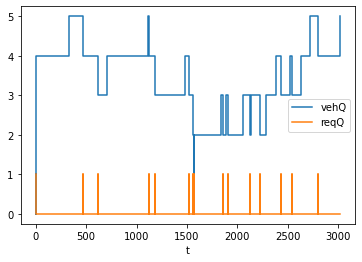

In [5]:
sim = testQ(params, nP = 15, nV = 5)

06-10-20 16:30:30-WARNING-Setting up 1h simulation at 2020-10-06 16:11:31 for 50 vehicles and 5 passengers in Nootdorp, Netherlands
06-10-20 16:30:30-INFO--------------------	Starting simulation	-------------------
06-10-20 16:30:31-INFO-pax    0  got to dest at                           2020-10-06 16:16:08
06-10-20 16:30:31-INFO-pax    1  got to dest at                           2020-10-06 16:41:09
06-10-20 16:30:31-INFO-pax    2  got to dest at                           2020-10-06 16:43:58
06-10-20 16:30:31-INFO-pax    3  got to dest at                           2020-10-06 16:51:30
06-10-20 16:30:31-INFO-pax    4  got to dest at                           2020-10-06 17:04:11
06-10-20 16:30:31-INFO-veh    2  quitted shift                            2020-10-06 19:11:30
06-10-20 16:30:31-INFO-veh    3  quitted shift                            2020-10-06 19:11:30
06-10-20 16:30:31-INFO-veh    4  quitted shift                            2020-10-06 19:11:30
06-10-20 16:30:31-INFO-veh    5  

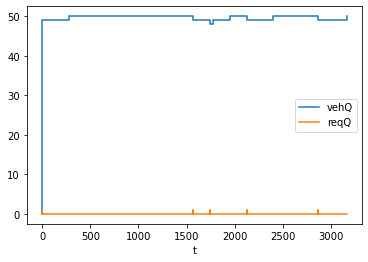

In [6]:
testQ(params, nP = 5, nV = 50)

06-10-20 16:30:32-WARNING-Setting up 1h simulation at 2020-10-06 16:01:32 for 3 vehicles and 50 passengers in Nootdorp, Netherlands
06-10-20 16:30:32-INFO--------------------	Starting simulation	-------------------
06-10-20 16:30:32-INFO-pax    0  got to dest at                           2020-10-06 16:08:29
06-10-20 16:30:32-INFO-pax    4  got to dest at                           2020-10-06 16:10:16
06-10-20 16:30:32-INFO-pax    1  got to dest at                           2020-10-06 16:10:51
06-10-20 16:30:32-INFO-pax    2  got to dest at                           2020-10-06 16:12:19
06-10-20 16:30:32-INFO-pax    6  got to dest at                           2020-10-06 16:13:39
06-10-20 16:30:32-INFO-pax    9  got to dest at                           2020-10-06 16:15:01
06-10-20 16:30:32-INFO-pax    7  got to dest at                           2020-10-06 16:15:05
06-10-20 16:30:32-INFO-pax   10  got to dest at                           2020-10-06 16:17:39
06-10-20 16:30:32-INFO-pax   11  

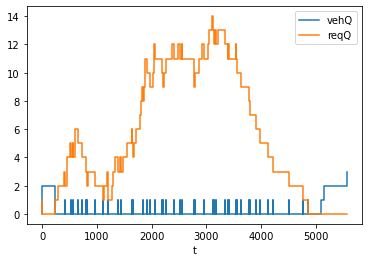

In [7]:
testQ(params, nP = 50, nV = 3)

batched platform

In [23]:
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber', 600]
inData.platforms

,fare,name,batch_time
id,,,
0,1,Uber,600


06-10-20 16:36:03-WARNING-Setting up 1h simulation at 2020-10-06 16:04:40 for 3 vehicles and 50 passengers in Nootdorp, Netherlands
06-10-20 16:36:03-INFO--------------------	Starting simulation	-------------------
06-10-20 16:36:03-INFO-pax    1  got to dest at                           2020-10-06 16:09:58
06-10-20 16:36:03-INFO-pax    2  got to dest at                           2020-10-06 16:11:23
06-10-20 16:36:03-INFO-pax    0  got to dest at                           2020-10-06 16:17:15
06-10-20 16:36:03-INFO-pax    5  got to dest at                           2020-10-06 16:20:47
06-10-20 16:36:03-INFO-pax   10  got to dest at                           2020-10-06 16:21:29
06-10-20 16:36:03-INFO-pax   11  got to dest at                           2020-10-06 16:29:33
06-10-20 16:36:03-INFO-pax    7  got to dest at                           2020-10-06 16:30:17
06-10-20 16:36:04-INFO-pax    9  got to dest at                           2020-10-06 16:30:28
06-10-20 16:36:04-INFO-pax   20  

platform
0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

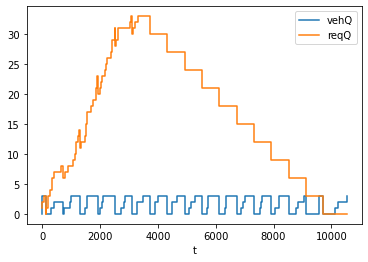

In [24]:
sim = simulate(params = params, inData = inData, event_based = False)
Qs = sim.runs[0].queues
Qs.groupby('platform')[['vehQ','reqQ']].plot(drawstyle = 'steps-post')    

-------------
Rafal Kucharski, 2020, Delft, r.m.kucharski@tudelft.nl